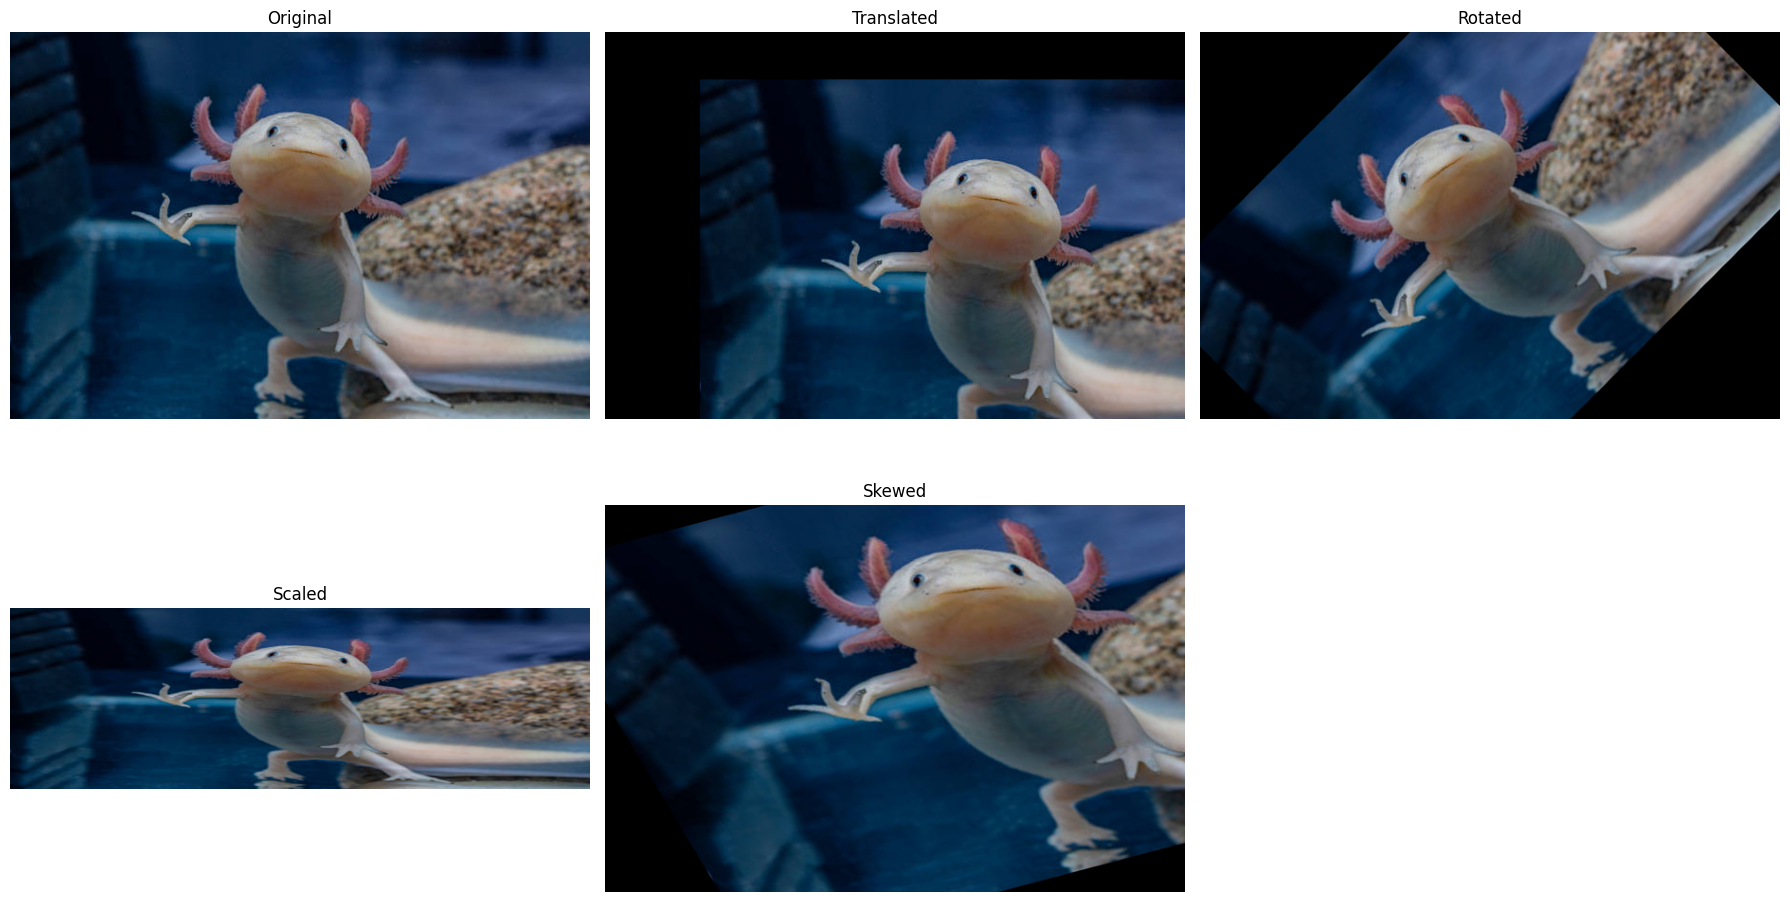

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '../input.jpg'
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Cannot load image at {img_path}")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, _ = img.shape

# --- Translation ---
tx, ty = 100, 50
M_trans = np.float32([[1, 0, tx], [0, 1, ty]])
img_trans = cv2.warpAffine(img_rgb, M_trans, (cols, rows))

# --- Rotation ---
angle = 45
M_rot = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
img_rot = cv2.warpAffine(img_rgb, M_rot, (cols, rows))

# --- Scaling ---
fx, fy = 1.5, 0.7
img_scaled = cv2.resize(img_rgb, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# --- Skewing (Shearing) ---
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_skew = cv2.getAffineTransform(pts1, pts2)
img_skewed = cv2.warpAffine(img_rgb, M_skew, (cols, rows))

# --- Display Results ---
titles = ['Original', 'Translated', 'Rotated', 'Scaled', 'Skewed']
images = [img_rgb, img_trans, img_rot, img_scaled, img_skewed]

plt.figure(figsize=(18, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()